In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
house = pd.read_csv('Housing .csv')


In [16]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
house.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [23]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
# required column keep and other delete from data set
house = house.drop(['stories', 'guestroom','hotwaterheating', 'airconditioning','prefarea','furnishingstatus'], axis=1)

In [41]:
# Convert 'yes' to 1, 'no' to 0 for mainroad and basement
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})

# Check
print(house[['mainroad', 'basement']].head())

   mainroad  basement
0         1         0
1         1         0
2         1         1
3         1         1
4         1         1


In [42]:
house.isnull().sum().sum()

np.int64(0)

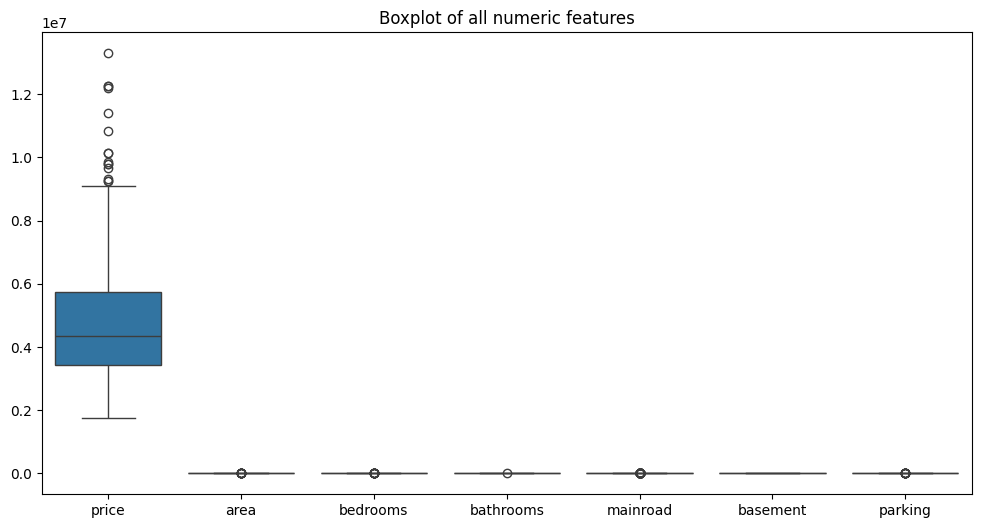

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=house)
plt.title("Boxplot of all numeric features")
plt.show()

In [49]:
house.head()

,price,area,bedrooms,bathrooms,mainroad,basement,parking
0,13300000,7420,4,2,1,0,2
1,12250000,8960,4,4,1,0,3
2,12250000,9960,3,2,1,1,2
3,12215000,7500,4,2,1,1,3
4,11410000,7420,4,1,1,1,2


In [46]:
# from above step we understan the dataset and their is no null value
# data tha data is redy to train for using algorithm

In [50]:
X = house.drop('price', axis=1)
y = house['price']


In [51]:
house

,price,area,bedrooms,bathrooms,mainroad,basement,parking
0,13300000,7420,4,2,1,0,2
1,12250000,8960,4,4,1,0,3
2,12250000,9960,3,2,1,1,2
3,12215000,7500,4,2,1,1,3
4,11410000,7420,4,1,1,1,2
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2
541,1767150,2400,3,1,0,0,0
542,1750000,3620,2,1,1,0,0
543,1750000,2910,3,1,0,0,0


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("MLR R2:", r2_score(y_test, y_pred))
print("MLR RMSE:", mean_squared_error(y_test, y_pred))

MLR R2: 0.4961084187541154
MLR RMSE: 2546955393956.6064


In [58]:
from sklearn.tree import DecisionTreeRegressor

# Create model
dt = DecisionTreeRegressor(random_state=42)

# Train model
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [59]:
y_pred_dt = dt.predict(X_test)


In [60]:
y_pred_dt

array([ 8400000.        ,  5880000.        ,  3356500.        ,
        5670000.        ,  3990000.        ,  4235000.        ,
        6090000.        ,  4893000.        ,  2870000.        ,
        2940000.        , 10850000.        ,  3243333.33333333,
        2408000.        ,  3703000.        ,  3990000.        ,
        4200000.        ,  3850000.        ,  6629000.        ,
        3640000.        ,  3710000.        ,  5670000.        ,
        5523000.        ,  3103333.33333333,  6475000.        ,
        3773000.        ,  5250000.        ,  3675000.        ,
        5460000.        ,  4900000.        ,  3300500.        ,
        4200000.        ,  4473000.        ,  6667500.        ,
        4235000.        ,  4382000.        ,  4060000.        ,
        8750000.        ,  2100000.        ,  2520000.        ,
        5460000.        ,  8400000.        ,  2870000.        ,
        5383000.        ,  4060000.        ,  2730000.        ,
        3500000.        ,  6667500.     

In [61]:
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R2: 0.28781364448710833
Decision Tree MSE: 3599795962438.838


In [62]:
print("Model Comparison:")
print(f"Linear Regression → R2: {r2_score(y_test, y_pred):.3f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Decision Tree    → R2: {r2_score(y_test, y_pred_dt):.3f}, MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")


Model Comparison:
Linear Regression → R2: 0.496, MSE: 2546955393956.61
Decision Tree    → R2: 0.288, MSE: 3599795962438.84


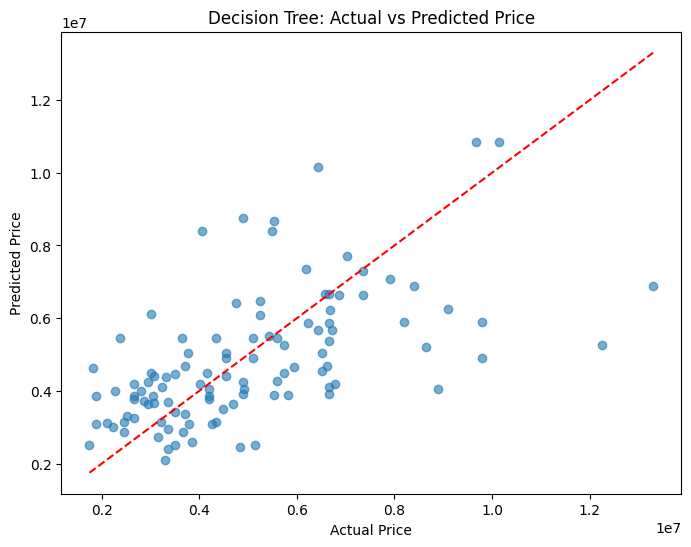

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted Price")
plt.show()


In [70]:
X_train

,area,bedrooms,bathrooms,mainroad,basement,parking
46,6000,3,2,1,0,1
93,7200,3,2,1,1,3
335,3816,2,1,1,1,2
412,2610,3,1,1,1,0
471,3750,3,1,1,0,0
...,...,...,...,...,...,...
71,6000,4,2,1,0,0
106,5450,4,2,1,1,0
270,4500,3,2,1,0,1
435,4040,2,1,1,0,0


In [66]:
import joblib

# Save the trained Decision Tree model
joblib.dump(dt, 'final_model.joblib')
print("Model saved successfully!")


Model saved successfully!


In [71]:
# List of features used in training
feature_columns = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'basement', 'parking']

# Take user input
num_houses = int(input("How many houses do you want to predict? "))
user_inputs = []

for i in range(num_houses):
    print(f"\nEnter details for House {i+1}:")
    area = float(input("Area (sqft): "))
    bedrooms = int(input("Bedrooms: "))
    bathrooms = int(input("Bathrooms: "))
    mainroad = int(input("Mainroad? (yes=1 / no=0): "))
    basement = int(input("Basement? (yes=1 / no=0): "))
    parking = int(input("Parking: "))

    user_inputs.append({
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'mainroad': mainroad,
        'basement': basement,
        'parking': parking
    })

# Convert to DataFrame
user_df = pd.DataFrame(user_inputs)

# Ensure column order matches training
user_df = user_df[feature_columns]

# Predict
predicted_prices = model.predict(user_df)

# Show results
for i, price in enumerate(predicted_prices):
    print(f"\nPredicted price for House {i+1}: ₹ {price:,.0f}")


How many houses do you want to predict? 1

Enter details for House 1:
Area (sqft): 2000
Bedrooms: 3
Bathrooms: 2
Mainroad? (yes=1 / no=0): 1
Basement? (yes=1 / no=0): 0
Parking: 3

Predicted price for House 1: ₹ 3,430,000


In [72]:
import joblib

# Save the trained Decision Tree model
joblib.dump(dt, 'final_model.joblib')
print("Model saved successfully!")

Model saved successfully!
